<a href="https://colab.research.google.com/github/eeeewn/IBM2022/blob/main/%EC%9A%A9%EC%82%B0%EA%B5%AC_%EB%94%B0%EB%A6%89%EC%9D%B4_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##준비

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  

In [4]:
from google.colab import drive
drive.mount('/content/drive')

bike = pd.read_excel("/content/drive/My Drive/Colab Notebooks/ITB/bike.xlsx")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##기본 정보

In [5]:
bike

,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2022-06-01,800,800. 목월공원 앞,일일권,\N,30대,3,221.24,2.13,9205.08,174
1,2022-06-01,800,800. 목월공원 앞,일일권,F,20대,3,677.5,6.15,26499.37,105
2,2022-06-01,800,800. 목월공원 앞,일일권,F,30대,3,339.87,3.07,13229.38,70
3,2022-06-01,800,800. 목월공원 앞,일일권,F,기타,1,249,2.98,12832.33,81
4,2022-06-01,800,800. 목월공원 앞,일일권,M,20대,2,581,4.51,19469.70,142
...,...,...,...,...,...,...,...,...,...,...,...
29714,2022-06-20,870,870.노들섬 서측 앞,정기권,M,30대,4,599.29,5.21,22502.47,142
29715,2022-06-20,870,870.노들섬 서측 앞,정기권,M,40대,3,944.25,7.56,32560.43,163
29716,2022-06-20,870,870.노들섬 서측 앞,정기권,M,50대,5,1318.77,10.2,43970.00,199
29717,2022-06-20,870,870.노들섬 서측 앞,정기권,M,60대,1,41.92,0.37,1580.00,12


In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29719 entries, 0 to 29718
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   대여일자     29719 non-null  datetime64[ns]
 1   대여소번호    29719 non-null  int64         
 2   대여소      29719 non-null  object        
 3   대여구분코드   29719 non-null  object        
 4   성별       27904 non-null  object        
 5   연령대코드    29719 non-null  object        
 6   이용건수     29719 non-null  int64         
 7   운동량      29719 non-null  object        
 8   탄소량      29719 non-null  object        
 9   이동거리(M)  29719 non-null  float64       
 10  이용시간(분)  29719 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 2.5+ MB


In [ ]:
bike.describe()

,대여소번호,이용건수,이동거리(M),이용시간(분)
count,29719.000000,29719.000000,29719.000000,29719.000000
mean,1759.356035,2.436219,9123.880704,71.956089
std,1626.629358,2.365479,11704.779346,90.739623
min,800.000000,1.000000,0.000000,0.000000
25%,825.000000,1.000000,2020.000000,17.000000
50%,843.000000,2.000000,5087.810000,44.000000
75%,870.000000,3.000000,11691.070000,92.000000
max,4639.000000,41.000000,161619.650000,1406.000000


##성별 전처리

In [11]:
pd.isna(bike).sum()

대여일자          0
대여소번호         0
대여소           0
대여구분코드        0
성별         1815
연령대코드         0
이용건수          0
운동량           0
탄소량           0
이동거리(M)       0
이용시간(분)       0
dtype: int64

In [12]:
bike_new = bike.dropna(subset=['성별'])

In [13]:
bike_new

,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2022-06-01,800,800. 목월공원 앞,일일권,\N,30대,3,221.24,2.13,9205.08,174
1,2022-06-01,800,800. 목월공원 앞,일일권,F,20대,3,677.5,6.15,26499.37,105
2,2022-06-01,800,800. 목월공원 앞,일일권,F,30대,3,339.87,3.07,13229.38,70
3,2022-06-01,800,800. 목월공원 앞,일일권,F,기타,1,249,2.98,12832.33,81
4,2022-06-01,800,800. 목월공원 앞,일일권,M,20대,2,581,4.51,19469.70,142
...,...,...,...,...,...,...,...,...,...,...,...
29714,2022-06-20,870,870.노들섬 서측 앞,정기권,M,30대,4,599.29,5.21,22502.47,142
29715,2022-06-20,870,870.노들섬 서측 앞,정기권,M,40대,3,944.25,7.56,32560.43,163
29716,2022-06-20,870,870.노들섬 서측 앞,정기권,M,50대,5,1318.77,10.2,43970.00,199
29717,2022-06-20,870,870.노들섬 서측 앞,정기권,M,60대,1,41.92,0.37,1580.00,12


In [14]:
bike_new['성별'].value_counts()

M     10823
\N     8921
F      8153
m         5
f         2
Name: 성별, dtype: int64

In [15]:
bike_new['성별'] = np.where(bike_new['성별'] == 'm', 'M', bike_new['성별'])
bike_new['성별'] = np.where(bike_new['성별'] == 'f', 'F', bike_new['성별'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
bike_new['성별'].value_counts()

M     10828
\N     8921
F      8155
Name: 성별, dtype: int64

##빈도

In [23]:
#plt.figure(figsize=(10, 5))

In [24]:
#sns.set(rc = {'figure.figsize':(15,8)})

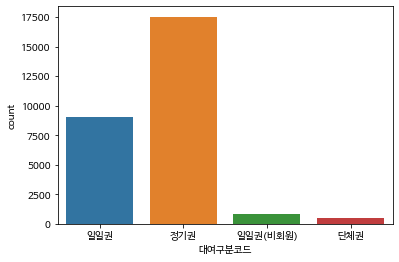

In [19]:
sns.countplot(data = bike_new, x = '대여구분코드')

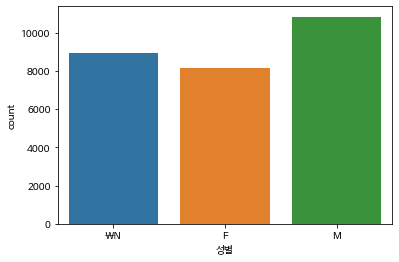

In [18]:
#성별 빈도
sns.countplot(data = bike_new, x = '성별')

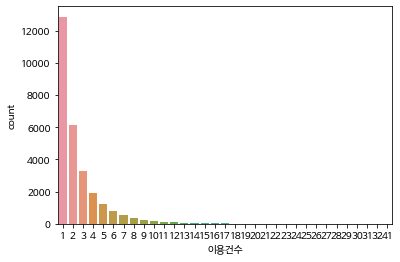

In [20]:
sns.countplot(data = bike_new, x = '이용건수')

In [ ]:
#이동거리
#sns.countplot(data = bike_new, x = '이동거리(M)')

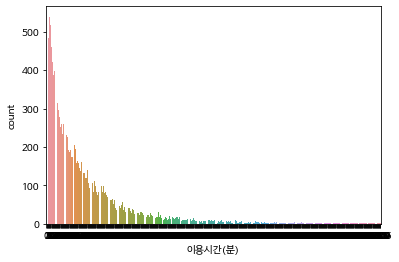

In [22]:
#이용시간
sns.countplot(data = bike_new, x = '이용시간(분)')

##집단별


###연령별

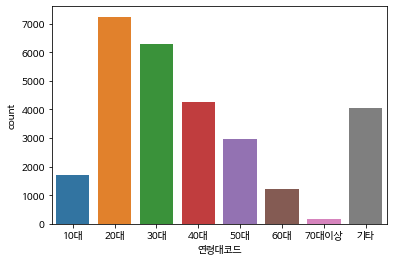

In [98]:
#연령대 빈도
sns.countplot(data = bike_new, x = '연령대코드', order = ['10대', '20대', '30대', '40대', '50대', '60대', '70대이상', '기타'])

In [99]:
#연령별 평균 이동거리
bike_new.groupby('연령대코드', as_index= False).agg(mean_distance = ('이동거리(M)', 'mean'))

,연령대코드,mean_distance
0,10대,5477.832079
1,20대,11749.289245
2,30대,11037.835700
3,40대,8981.571326
4,50대,7730.517583
5,60대,5085.924331
6,70대이상,3346.892832
7,기타,7418.277117


In [100]:
##연령별 평균 이동거리 막대그래프로 표현
bike_age_distance = bike_new.groupby('연령대코드', as_index= False).agg(mean_distance = ('이동거리(M)', 'mean'))

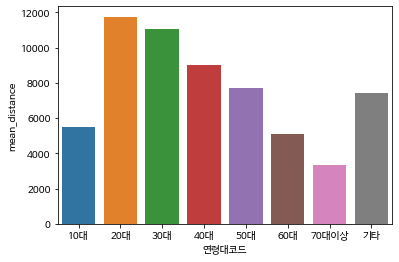

In [101]:
sns.barplot(data = bike_age_distance, x = '연령대코드', y = 'mean_distance')

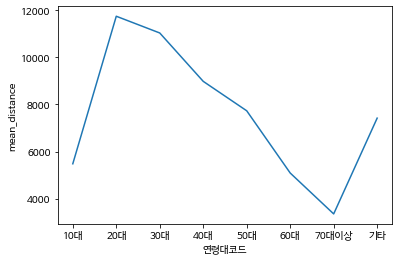

In [102]:
sns.lineplot(data = bike_age_distance,  x = '연령대코드', y = 'mean_distance' )

In [106]:
#연령별 평균 이용건수
bike_new.groupby('연령대코드', as_index= False).agg(mean_num = ('이용건수', 'mean'))

,연령대코드,mean_num
0,10대,1.524533
1,20대,3.272162
2,30대,3.011918
3,40대,2.287822
4,50대,1.886594
5,60대,1.406199
6,70대이상,1.115607
7,기타,1.862667


In [105]:
#연령별 평균 이용건수
bike_age_num = bike_new.groupby('연령대코드', as_index= False).agg(mean_num = ('이용건수', 'mean'))

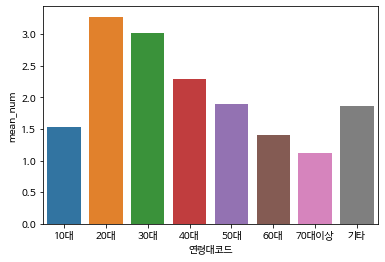

In [104]:
sns.barplot(data = bike_age_num, x = '연령대코드', y = 'mean_num')

In [103]:
#연령별 이용시간
bike_new.groupby('연령대코드', as_index= False).agg(mean_time = ('이용시간(분)', 'mean'))

,연령대코드,mean_time
0,10대,45.470210
1,20대,92.962579
2,30대,84.391864
3,40대,68.969789
4,50대,59.290792
5,60대,46.570147
6,70대이상,41.676301
7,기타,62.944720


###대여소별

In [107]:
#대여소 이용 빈도
bike_new.groupby('대여소번호', as_index= False).agg(n = ('대여소번호', 'count'))

,대여소번호,n
0,800,382
1,802,194
2,803,79
3,805,407
4,806,396
...,...,...
84,4634,303
85,4636,148
86,4637,52
87,4638,52


In [108]:
bike_place_n = bike_new.groupby('대여소', as_index= False).agg(n = ('대여소', 'count'))

In [109]:
#대여소 이용건수 상위30
bike_place_n.sort_values('n', ascending=False).head(15)

,대여소,n
88,870.노들섬 서측 앞,682
50,825. 서빙고동 주민센터 앞,677
75,853.용산역 맞은편,668
81,860.LG한강 자이아파트 앞,597
61,837. 한남나들목 입구,588
54,829. 베르가모앞,571
65,841. 신용산역 1번 출구,519
42,815. LIG강촌아파트 103동앞,505
62,838. 숙대입구역 4번출구,497
46,819. 선린인터넷 고등학교,495


In [110]:
##대여소 이용건수 하위10
bike_place_n.sort_values('n').head(10)

,대여소,n
84,865.하얏트호텔 앞,45
80,859.남산공원 야외식물원 앞,51
27,4637. 용산시티파크 101동 앞,52
28,4638. 청파동삼거리 앞,52
32,803. 한남초교 앞 보도육교,79
29,4639. 동빙고근린공원,83
9,4612. 한남 준 J.FSS 앞,94
19,4623. 라인프랜즈이태원점 앞,118
76,854.HID 유족동지회 앞,120
13,4617. 동원베네스트 건너편,123


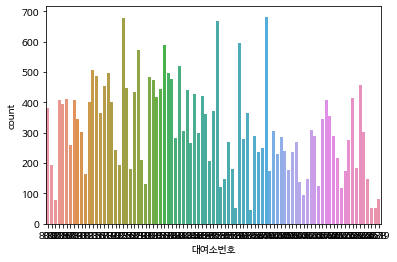

In [111]:
sns.countplot(data = bike_new, x = '대여소번호')

In [112]:
#대여소별 평균 이동거리
bike_new.groupby('대여소번호', as_index= False).agg(mean_distance = ('이동거리(M)', 'mean'))

,대여소번호,mean_distance
0,800,8724.194450
1,802,4284.253351
2,803,5104.711899
3,805,6413.170221
4,806,7093.320606
...,...,...
84,4634,8363.689967
85,4636,4598.284662
86,4637,4655.086154
87,4638,3185.180192


In [113]:
#대여소별 평균 이용건수
bike_new.groupby('대여소번호', as_index= False).agg(mean_num = ('이용건수', 'mean'))

,대여소번호,mean_num
0,800,2.481675
1,802,1.350515
2,803,1.151899
3,805,2.729730
4,806,2.305556
...,...,...
84,4634,2.069307
85,4636,1.736486
86,4637,1.403846
87,4638,1.442308


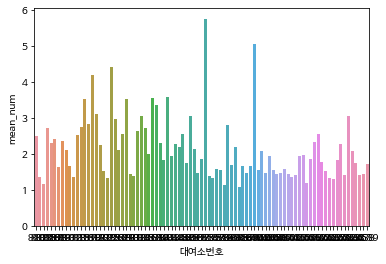

In [114]:
bike_place_num = bike_new.groupby('대여소번호', as_index= False).agg(mean_num = ('이용건수', 'mean'))
sns.barplot(data = bike_place_num, x = '대여소번호', y = 'mean_num')

####성별 대여소 이용건수

In [115]:
#남성 대여소 이용건수
place_male_n = bike_new.query ('성별 == "M"').groupby ('대여소', as_index = False) .agg (n = ('대여소','count'))

In [116]:
 bike_new.query ('성별 == "M"').groupby ('대여소', as_index = False) .agg (n = ('대여소','count')).sort_values('n', ascending=False).head(5)

,대여소,n
88,870.노들섬 서측 앞,248
50,825. 서빙고동 주민센터 앞,244
75,853.용산역 맞은편,235
61,837. 한남나들목 입구,213
81,860.LG한강 자이아파트 앞,209


In [117]:
#여성 대여소 이용건수
bike_new.query ('성별 == "F"').groupby ('대여소', as_index = False) .agg (n = ('대여소','count')).sort_values('n', ascending=False).head(5)

,대여소,n
88,870.노들섬 서측 앞,222
50,825. 서빙고동 주민센터 앞,219
75,853.용산역 맞은편,216
54,829. 베르가모앞,193
81,860.LG한강 자이아파트 앞,192


#### 연령별 이용건수 

In [118]:
#연령별 이용건수 
bike_new.query ('연령대코드 == "10대"').groupby ('대여소', as_index = False) .agg (n = ('대여소','count')).sort_values('n', ascending=False).head(5)

,대여소,n
50,825. 서빙고동 주민센터 앞,75
63,839. 보광동 삼성리버빌아파트 앞,62
75,853.용산역 맞은편,60
87,870.노들섬 서측 앞,59
42,815. LIG강촌아파트 103동앞,52


In [119]:
bike_new.query ('연령대코드 == "20대"').groupby ('대여소', as_index = False) .agg (n = ('대여소','count')).sort_values('n', ascending=False).head(5)

,대여소,n
88,870.노들섬 서측 앞,137
75,853.용산역 맞은편,133
54,829. 베르가모앞,128
50,825. 서빙고동 주민센터 앞,128
61,837. 한남나들목 입구,125


In [120]:
bike_new.query ('연령대코드 == "30대"').groupby ('대여소', as_index = False) .agg (n = ('대여소','count')).sort_values('n', ascending=False).head(5)

,대여소,n
88,870.노들섬 서측 앞,125
75,853.용산역 맞은편,124
61,837. 한남나들목 입구,117
50,825. 서빙고동 주민센터 앞,117
65,841. 신용산역 1번 출구,116


In [121]:
bike_new.query ('연령대코드 == "40대"').groupby ('대여소', as_index = False) .agg (n = ('대여소','count')).sort_values('n', ascending=False).head(5)

,대여소,n
81,860.LG한강 자이아파트 앞,113
88,870.노들섬 서측 앞,108
75,853.용산역 맞은편,107
50,825. 서빙고동 주민센터 앞,104
61,837. 한남나들목 입구,101


In [122]:
bike_new.query ('연령대코드 == "50대"').groupby ('대여소', as_index = False) .agg (n = ('대여소','count')).sort_values('n', ascending=False).head(5)

,대여소,n
50,825. 서빙고동 주민센터 앞,91
61,837. 한남나들목 입구,83
81,860.LG한강 자이아파트 앞,76
88,870.노들섬 서측 앞,73
75,853.용산역 맞은편,71


In [123]:
bike_new.query ('연령대코드 == "60대"').groupby ('대여소', as_index = False) .agg (n = ('대여소','count')).sort_values('n', ascending=False).head(5)

,대여소,n
88,870.노들섬 서측 앞,53
67,844. 이촌2동 동원베네스트 아파트 앞,49
50,825. 서빙고동 주민센터 앞,43
75,853.용산역 맞은편,42
54,829. 베르가모앞,41


In [124]:
bike_new.query ('연령대코드 == "70대이상"').groupby ('대여소', as_index = False) .agg (n = ('대여소','count')).sort_values('n', ascending=False).head(5)

,대여소,n
23,820. 청파동입구 교차로,12
36,838. 숙대입구역 4번출구,12
19,815. LIG강촌아파트 103동앞,11
47,853.용산역 맞은편,10
53,867.서빙고역 광장(1번출구),7


####요일별 이용건수

In [125]:
bike_new['요일'] = bike_new['대여일자'].dt.day_name()
bike_new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),요일,일
0,2022-06-01,800,800. 목월공원 앞,일일권,\N,30대,3,221.24,2.13,9205.08,174,Wednesday,01
1,2022-06-01,800,800. 목월공원 앞,일일권,F,20대,3,677.5,6.15,26499.37,105,Wednesday,01
2,2022-06-01,800,800. 목월공원 앞,일일권,F,30대,3,339.87,3.07,13229.38,70,Wednesday,01
3,2022-06-01,800,800. 목월공원 앞,일일권,F,기타,1,249,2.98,12832.33,81,Wednesday,01
4,2022-06-01,800,800. 목월공원 앞,일일권,M,20대,2,581,4.51,19469.70,142,Wednesday,01


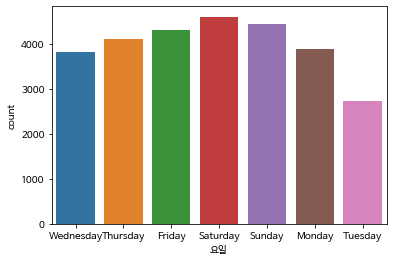

In [126]:
#요일별 빈도
sns.countplot(data = bike_new, x = '요일')

In [127]:
bike_new['일'] = bike_new['대여일자'].dt.strftime('%d')
bike_new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),요일,일
0,2022-06-01,800,800. 목월공원 앞,일일권,\N,30대,3,221.24,2.13,9205.08,174,Wednesday,01
1,2022-06-01,800,800. 목월공원 앞,일일권,F,20대,3,677.5,6.15,26499.37,105,Wednesday,01
2,2022-06-01,800,800. 목월공원 앞,일일권,F,30대,3,339.87,3.07,13229.38,70,Wednesday,01
3,2022-06-01,800,800. 목월공원 앞,일일권,F,기타,1,249,2.98,12832.33,81,Wednesday,01
4,2022-06-01,800,800. 목월공원 앞,일일권,M,20대,2,581,4.51,19469.70,142,Wednesday,01


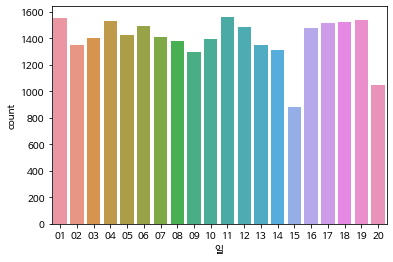

In [128]:
#일별 빈도
sns.countplot(data = bike_new, x = '일')

In [129]:
#월요일
bike_new.query ('대여일자.dt.dayofweek == 0').groupby ('대여소', as_index = False) .agg (n = ('대여소','count')).sort_values('n', ascending=False).head(5)

,대여소,n
47,825. 서빙고동 주민센터 앞,104
85,870.노들섬 서측 앞,103
72,853.용산역 맞은편,95
51,829. 베르가모앞,90
78,860.LG한강 자이아파트 앞,89


In [130]:
#화요일
bike_new.query ('대여일자.dt.dayofweek == 1').groupby ('대여소', as_index = False) .agg (n = ('대여소','count')).sort_values('n', ascending=False).head(5)

,대여소,n
50,825. 서빙고동 주민센터 앞,64
75,853.용산역 맞은편,64
61,837. 한남나들목 입구,62
88,870.노들섬 서측 앞,54
81,860.LG한강 자이아파트 앞,52


In [131]:
#수요일
bike_new.query ('대여일자.dt.dayofweek == 2').groupby ('대여소', as_index = False) .agg (n = ('대여소','count')).sort_values('n', ascending=False).head(5)

,대여소,n
87,870.노들섬 서측 앞,98
75,853.용산역 맞은편,98
50,825. 서빙고동 주민센터 앞,89
61,837. 한남나들목 입구,83
80,860.LG한강 자이아파트 앞,81


In [132]:
#목요일
bike_new.query ('대여일자.dt.dayofweek == 3').groupby ('대여소', as_index = False) .agg (n = ('대여소','count')).sort_values('n', ascending=False).head(5)

,대여소,n
75,853.용산역 맞은편,93
50,825. 서빙고동 주민센터 앞,93
88,870.노들섬 서측 앞,89
54,829. 베르가모앞,86
61,837. 한남나들목 입구,85


In [133]:
#금요일
bike_new.query ('대여일자.dt.dayofweek == 4').groupby ('대여소', as_index = False) .agg (n = ('대여소','count')).sort_values('n', ascending=False).head(5)

,대여소,n
88,870.노들섬 서측 앞,100
50,825. 서빙고동 주민센터 앞,97
75,853.용산역 맞은편,96
81,860.LG한강 자이아파트 앞,91
61,837. 한남나들목 입구,84


In [134]:
#토요일
bike_new.query ('대여일자.dt.dayofweek == 5').groupby ('대여소', as_index = False) .agg (n = ('대여소','count')).sort_values('n', ascending=False).head(5)

,대여소,n
88,870.노들섬 서측 앞,127
75,853.용산역 맞은편,118
50,825. 서빙고동 주민센터 앞,114
81,860.LG한강 자이아파트 앞,103
54,829. 베르가모앞,90


In [135]:
#일요일
bike_new.query ('대여일자.dt.dayofweek == 6').groupby ('대여소', as_index = False) .agg (n = ('대여소','count')).sort_values('n', ascending=False).head(5)

,대여소,n
50,825. 서빙고동 주민센터 앞,116
88,870.노들섬 서측 앞,111
75,853.용산역 맞은편,104
81,860.LG한강 자이아파트 앞,103
61,837. 한남나들목 입구,98


##산점도

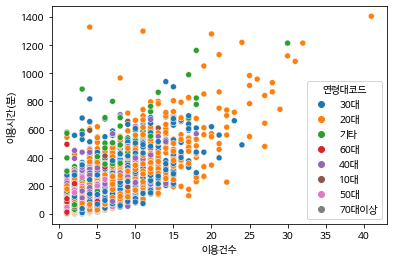

In [58]:
sns.scatterplot(data = bike_new, x = '이용건수', y = '이용시간(분)', hue = '연령대코드')

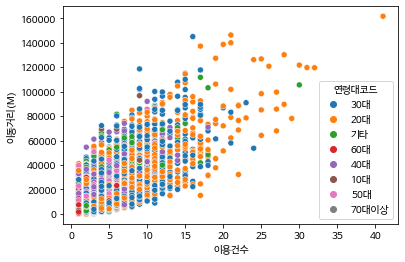

In [59]:
sns.scatterplot(data = bike_new, x = '이용건수', y = '이동거리(M)', hue = '연령대코드')

##선그래프


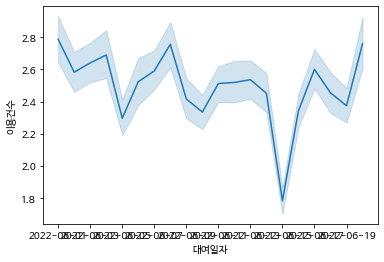

In [60]:
sns.lineplot(data = bike_new, x = '대여일자', y = '이용건수')

In [61]:
bike_male = bike_new.query('성별 == "M"')
bike_female = bike_new.query('성별 == "F"')

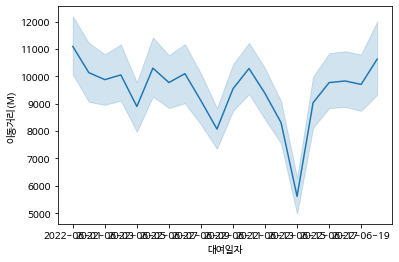

In [62]:
#남성 대여일자에 따른 이동거리
sns.lineplot(data = bike_male, x = '대여일자', y = '이동거리(M)')

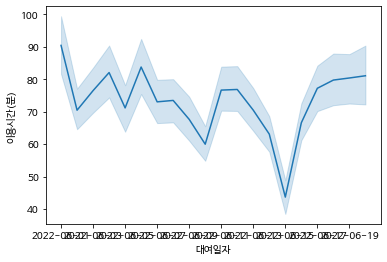

In [63]:
#남성 대여일자에 따른 이용시간
sns.lineplot(data = bike_male, x = '대여일자', y = '이용시간(분)')

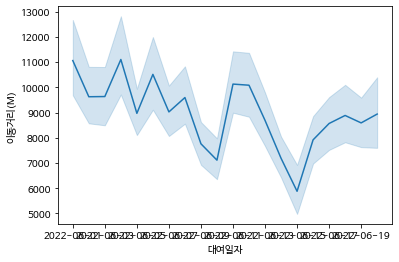

In [64]:
#여성 대여일자에 따른 이동거리
sns.lineplot(data = bike_female, x = '대여일자', y = '이동거리(M)')

In [65]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27904 entries, 0 to 29718
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   대여일자     27904 non-null  datetime64[ns]
 1   대여소번호    27904 non-null  int64         
 2   대여소      27904 non-null  object        
 3   대여구분코드   27904 non-null  object        
 4   성별       27904 non-null  object        
 5   연령대코드    27904 non-null  object        
 6   이용건수     27904 non-null  int64         
 7   운동량      27904 non-null  object        
 8   탄소량      27904 non-null  object        
 9   이동거리(M)  27904 non-null  float64       
 10  이용시간(분)  27904 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 3.6+ MB


In [66]:
bike_new['연령대코드'].value_counts()

20대      7242
30대      6293
40대      4270
기타       4034
50대      2954
10대      1712
60대      1226
70대이상     173
Name: 연령대코드, dtype: int64

In [67]:
bike_new2 = bike_new.query('연령대코드 != "기타"')

In [68]:
bike_new2['연령대코드'].value_counts()

20대      7242
30대      6293
40대      4270
50대      2954
10대      1712
60대      1226
70대이상     173
Name: 연령대코드, dtype: int64

In [69]:
bike_new2["연령대코드2"] = bike_new2["연령대코드"].str.replace("대", "", )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
bike_new.describe()

,대여소번호,이용건수,이동거리(M),이용시간(분)
count,27904.000000,27904.000000,27904.000000,27904.000000
mean,1769.576118,2.509819,9384.118598,74.183916
std,1632.698960,2.417601,11947.782118,92.699282
min,800.000000,1.000000,0.000000,0.000000
25%,825.000000,1.000000,2084.027500,17.750000
50%,843.000000,2.000000,5288.110000,45.000000
75%,870.000000,3.000000,12040.150000,95.000000
max,4639.000000,41.000000,161619.650000,1406.000000
